In [2]:
# run options
num_images = 100
device = "cuda"
quantizations = ["none", "skip_vision_tower", "full"]


In [3]:
for quantization in quantizations:
    print(f"Running Quantization-Mode: {quantization}")
    !uv run main.py -q {quantization} -n {num_images} -d {device} --save-captions

Running Quantization-Mode: none


INFO: Downloading COCO2017 validation set from: http://images.cocodataset.org/zips/val2017.zip
INFO: Download complete
INFO: Extracting dataset...
INFO: Extraction complete
INFO: Downloading COCO2017 annotations set from: http://images.cocodataset.org/annotations/annotations_trainval2017.zip
INFO: Download complete
INFO: Extracting captions
INFO: Extraction complete
INFO: Starting inference - Quantization: none, Device: cuda, Images: 100
INFO: Using device: cuda, dtype: torch.bfloat16
INFO: Loading model...
INFO: Model weights loaded in 6.52s
INFO: Model ready (total: 7.26s)
INFO: Processing 100 images...
INFO: [1/100] 000000338905.jpg - 10.96s, 128 tokens: In this image, we can see a group of people sitting around a table under a large white umbrella. The table is set with a variety of food items, including plates of sandwiches, salads, and other dishes. The people are engaged in eating and conversing, suggesting a social gathering or a meal. The setting appears to be outdoors, possib

In [4]:
from evaluation import calculate_cider_score, calculate_bleu_score, calculate_spice_score, import_data, load_metrics
from diagrams import plot_eval_summary, plot_efficiency_pies, show_example_captions
from pprint import pprint

results = {}

for mode in quantizations:
    print(f"Evaluating mode: {mode}")
    actual_captions, predicted_captions = import_data(mode)

    cider_mean = calculate_cider_score(actual_captions, predicted_captions)
    bleu_mean  = calculate_bleu_score(actual_captions, predicted_captions)
    spice_mean = calculate_spice_score(actual_captions, predicted_captions) 

    results[mode] = {
        "CIDEr": cider_mean,
        "BLEU-4": bleu_mean,
        "SPICE": spice_mean,
    }

pprint(results)  


Evaluating mode: none
{'testlen': 4296, 'reflen': 1254, 'guess': [4296, 4196, 4096, 3996], 'correct': [1141, 458, 166, 71]}
ratio: 3.4258373205714308
SPICE could not be executed: [Errno 2] No such file or directory: 'java'
Evaluating mode: skip_vision_tower
{'testlen': 1867, 'reflen': 1145, 'guess': [1867, 1767, 1667, 1567], 'correct': [896, 385, 146, 69]}
ratio: 1.6305676855880955
SPICE could not be executed: [Errno 2] No such file or directory: 'java'
Evaluating mode: full
{'testlen': 1848, 'reflen': 1156, 'guess': [1848, 1748, 1648, 1548], 'correct': [907, 395, 151, 71]}
ratio: 1.5986159169536345
SPICE could not be executed: [Errno 2] No such file or directory: 'java'
{'full': {'BLEU-4': 0.1469322164635205,
          'CIDEr': 0.607897903590244,
          'SPICE': None},
 'none': {'BLEU-4': 0.0675939918254497,
          'CIDEr': 0.3422985853710352,
          'SPICE': None},
 'skip_vision_tower': {'BLEU-4': 0.14170863198003825,
                       'CIDEr': 0.6192173599722254,
     

In [5]:

metrics = load_metrics()
pprint(metrics)

{'full': {'latency_per_image': 3.587950391769409,
          'model_size': 2336.5477905273438,
          'peak_VRAM': 3201.98388671875,
          'throughput': 0.278386738000047},
 'none': {'latency_per_image': 7.217856297492981,
          'model_size': 4284.425506591797,
          'peak_VRAM': 6053.52978515625,
          'throughput': 0.13843597584485134},
 'skip_vision_tower': {'latency_per_image': 3.6152966952323915,
                       'model_size': 2240.5419311523438,
                       'peak_VRAM': 3108.3466796875,
                       'throughput': 0.27627000277997454}}


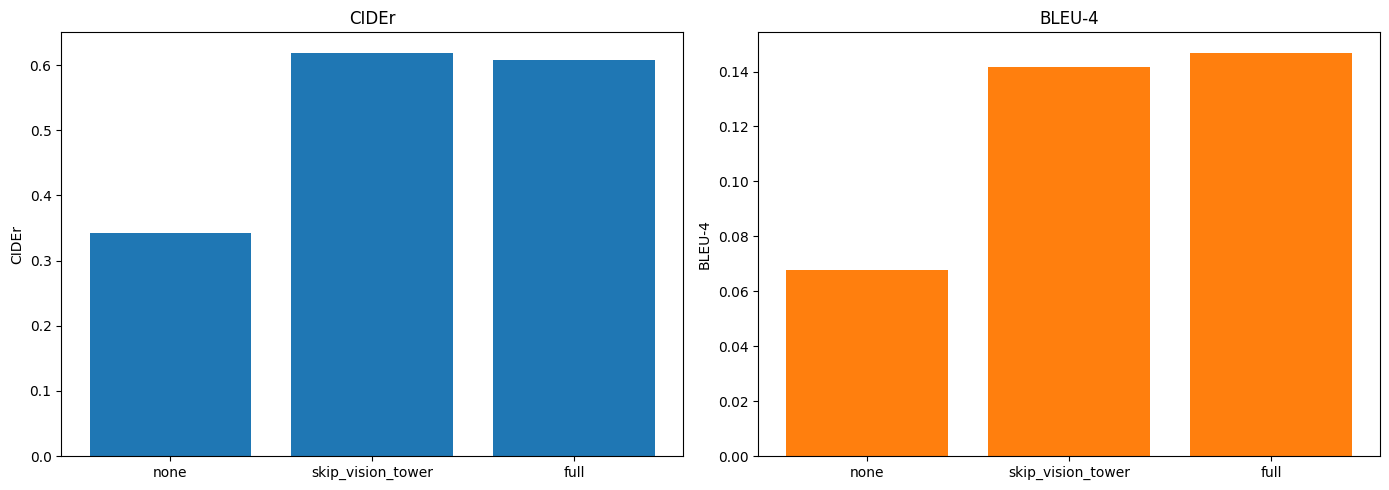

In [6]:
plot_eval_summary(results)

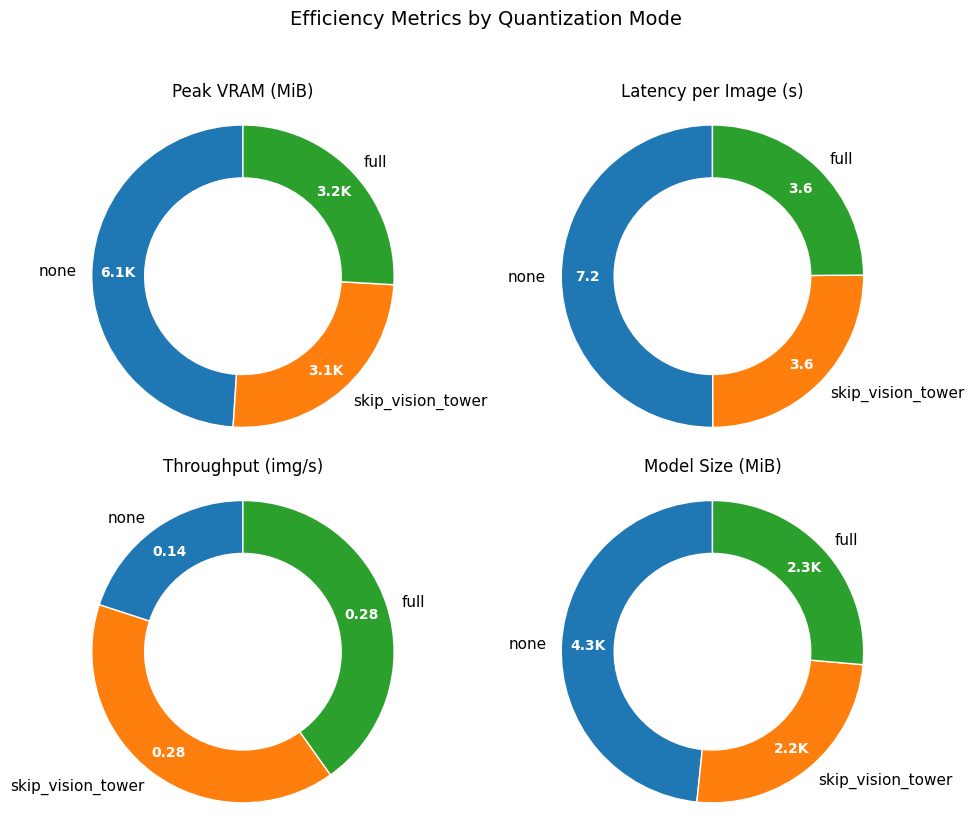

In [7]:
plot_efficiency_pies(metrics)

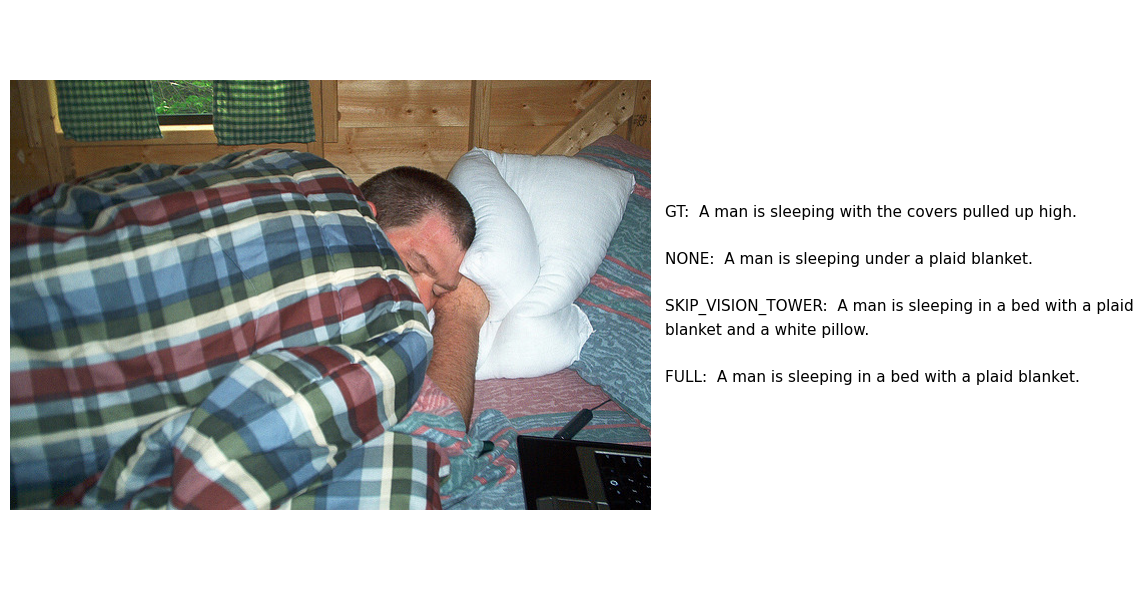

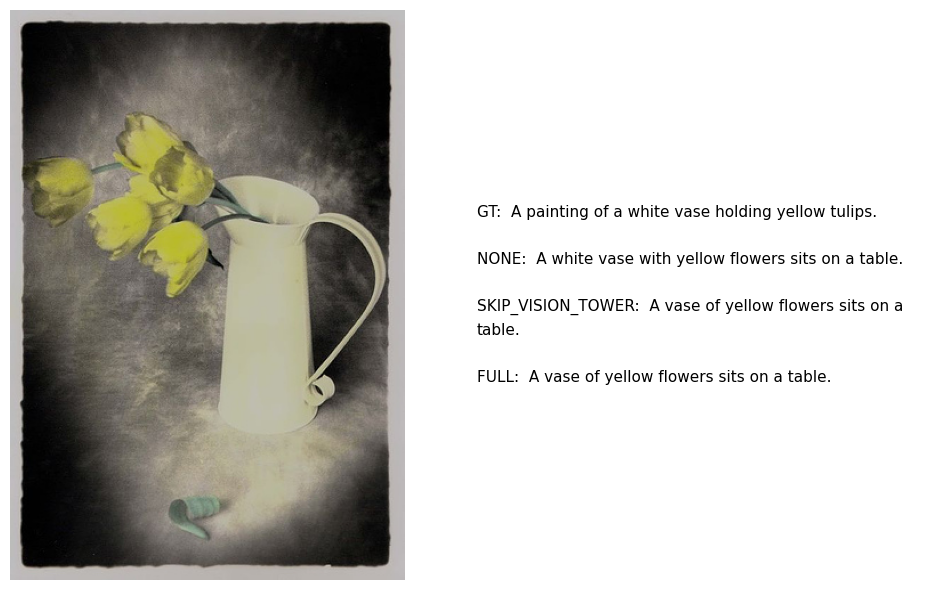

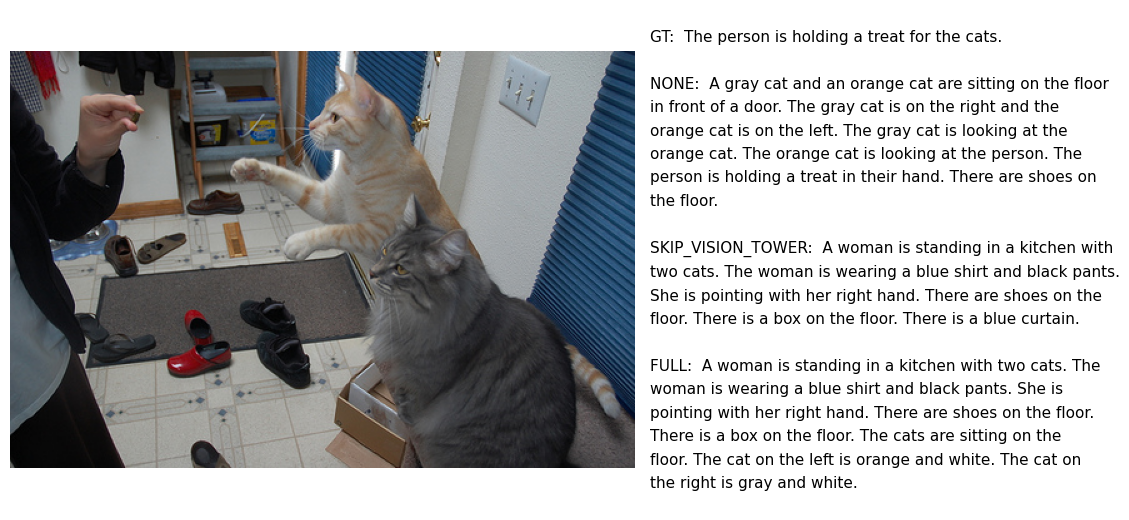

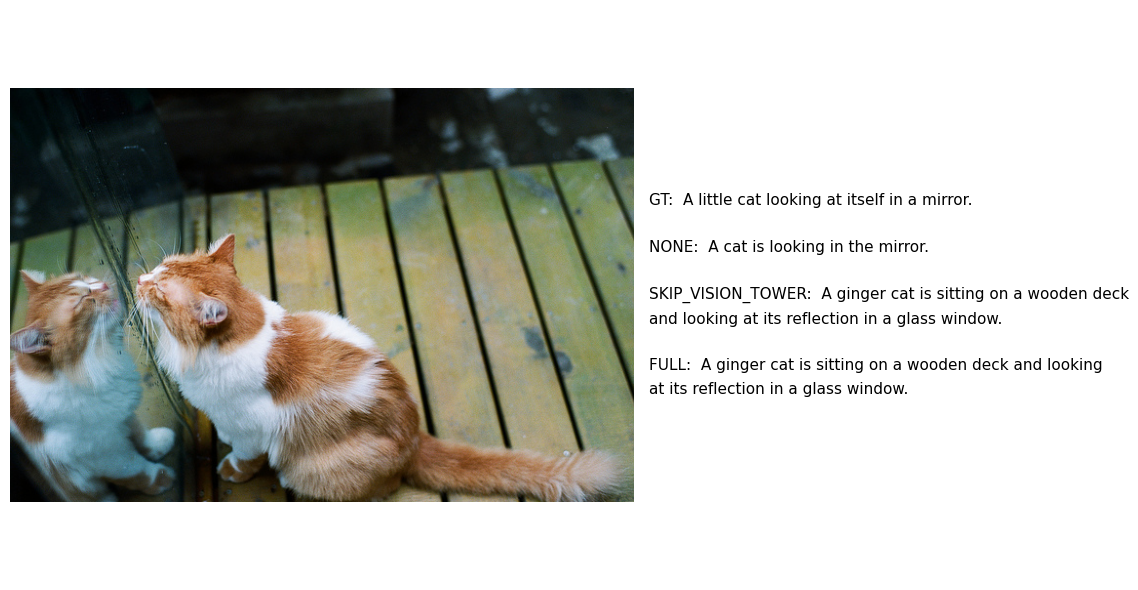

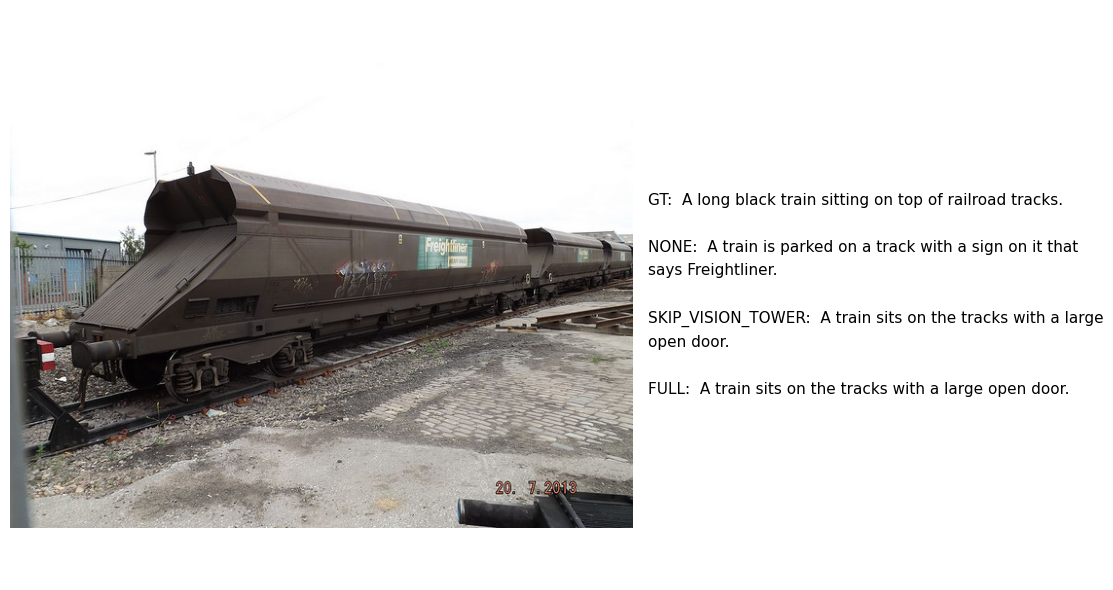

In [8]:
show_example_captions(num_examples=5, seed=1)